<a href="https://colab.research.google.com/github/soodeh-nilforoushan/Recurrent-Neural-Network/blob/main/4_TF_ANN_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#install tensorflow
!pip install -q tensorflow
import tensorflow as tf
print(tf.__version__)

2.12.0


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [15]:
#make the dataset
N=1000
X=np.random.random((N,2))* 6 -3
# two dimensional data point uniformely distributed between (-3,+3)
#the random function returns data uniformly distributed between 0 and 1. So if we multiply by six and subtract three, this scales the data to be between minus three and plus three.
Y=np.cos(2*X[:,0]) +np.cos(3*X[:,1])
#we just wanted a nonlinear function with a few bumps and curves, and the cosine does just that.


this implements the function:
# y=cos(2X1)+cos(3X2)


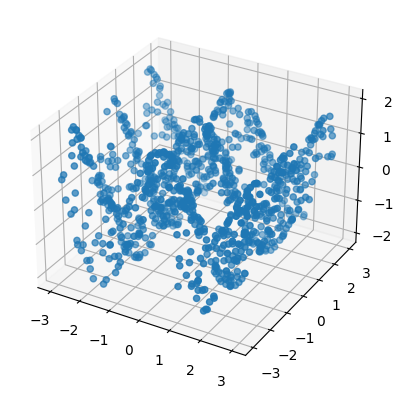

In [16]:
fig=plt.figure()
ax=fig.add_subplot(111,projection="3d")
ax.scatter(X[:,0],X[:,1],Y)

In [17]:
#build the model

model=tf.keras.models.Sequential([
    tf.keras.layers.Dense(128,input_shape=(2,),activation="relu"),
    tf.keras.layers.Dense(1)
])

In [18]:
from keras.engine.training import optimizer
#compile and fit
#the learning rate is 0.01
opt=tf.keras.optimizers.Adam(0.01)
model.compile(optimizer=opt,loss="mse")
r=model.fit(X,Y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 1.0701
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 1.0338
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 1.0294
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9817
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.9418
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.9092
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7659
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6793
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6161
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 0.5578
Epoch 11/100
32/32 [==============================] - 0s 4ms/step - loss: 0.5501
Epoch 12/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5123
Epoch 13/100
32/32 [=================

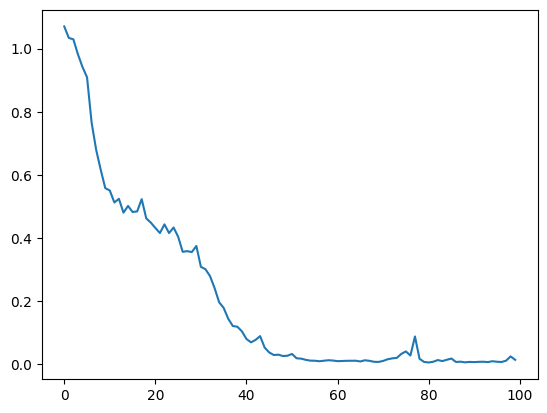

In [19]:
#plot the loss
plt.plot(r.history["loss"],label="loss")

Next, we're going to plot the loss per iteration to confirm that the training process converged nicely.

If it doesn't, that means you have to go back and modify your hyper parameters.

79/79 [==============================] - 0s 4ms/step


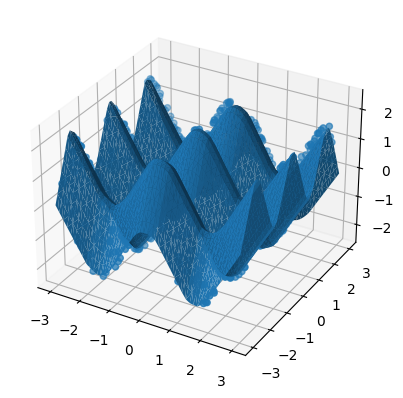

In [22]:
#plot the lprediction surface
fig=plt.figure()
ax=fig.add_subplot(111, projection="3d")
ax.scatter(X[:,0],X[:,1],Y)
#surface plot
line=np.linspace(-3,3,50)
xx,yy=np.meshgrid(line,line)
Xgrid=np.vstack((xx.flatten(),yy.flatten())).T
Yhat=model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0],Xgrid[:,1],Yhat,linewidth=0.2,antialiased=True)
plt.show()

#It is amqzing We can approximate a cosine equation without having any cosines.

79/79 [==============================] - 0s 2ms/step


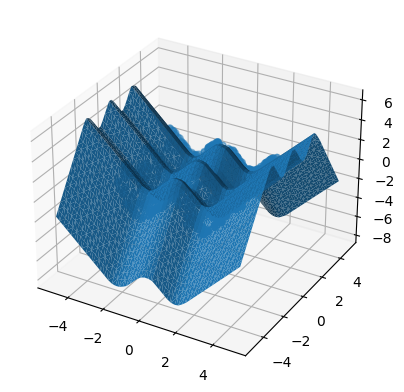

In [23]:
#can it extrapolate?
#plot the prediction surface
fig=plt.figure()
ax=fig.add_subplot(111, projection="3d")
ax.scatter(X[:,0],X[:,1],Y)
#surface plot
line=np.linspace(-5,5,50)
xx,yy=np.meshgrid(line,line)
Xgrid=np.vstack((xx.flatten(),yy.flatten())).T
Yhat=model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0],Xgrid[:,1],Yhat,linewidth=0.2,antialiased=True)
plt.show()

So we know that the cosine function is going to repeat periodically from minus infinity to plus infinity.

So you might wonder, can the neural network figure that out?

So what I've done here is I've changed linspace to go from minus five to plus five, so just to make it a little bigger. And if we run this. We see that it doesn't quite work.

So it just assumes that the pattern keeps going in the direction it was going at the edges. And of course, this is because the neural network doesn't use a periodic activation function, so we